In [1]:
from recom.datasets import load_ml_small_rating

# load data
dataset = load_ml_small_rating(need_raw=True)

# load features
ratings = dataset['raw']
ratings_train_dict = dataset['train_dict']
ratings_test_dict = dataset['test_dict']
n_user = dataset['n_user']
n_item = dataset['n_item']
user2ix = dataset['user2ix']
ix2user = dataset['ix2user']
item2ix = dataset['item2ix']
ix2item = dataset['ix2item']

del dataset

print(f'Users: {n_user}, Items: {n_item}. Sparsity: {round(1-len(ratings)/n_user/n_item, 4)}')
print(f'User reduced from {len(user2ix.keys())} to {len(ratings_train_dict.keys())}')

Users: 610, Items: 9724. Sparsity: 0.983
User reduced from 610 to 607


In [47]:
from recom.model.pairwise import BPR
from torch import optim
import warnings
warnings.filterwarnings("ignore")

k_dim = 32
std_user = 1
std_item = 1

bpr = BPR(
    n_user=n_user, n_item=n_item
    , k_dim=k_dim
    , std_user=std_user
    , std_item=std_item
)
opt = optim.SGD(bpr.parameters(), lr=0.1, weight_decay=0.01, momentum=0.01)

bpr.fit(ratings_train_dict, opt
    , n_epochs=32, use_cuda=False
    # , user_per_ep=128
    # , pos_item_per_ep=4
    # , neg_sample_size=4
    , report_interval=4
)

Epoch: 4, Time: 3.88, /Average loss 27.49673
Epoch: 8, Time: 3.4, /Average loss 19.4202
Epoch: 12, Time: 3.58, /Average loss 19.04895
Epoch: 16, Time: 4.11, /Average loss 20.19342
Epoch: 20, Time: 3.94, /Average loss 16.62968
Epoch: 24, Time: 4.02, /Average loss 18.99509
Epoch: 28, Time: 4.08, /Average loss 21.68209
Epoch: 32, Time: 3.94, /Average loss 17.52569


BPR(
  (embedding_user): Embedding(610, 32)
  (embedding_item): Embedding(9724, 32)
)

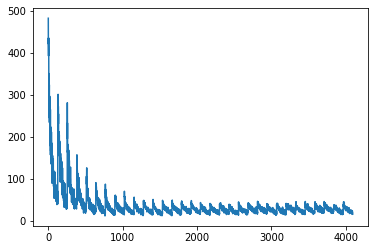

In [48]:
import matplotlib.pyplot as plt

loss = bpr.last_train_loss

plt.plot(list(range(len(loss))), loss)